In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *

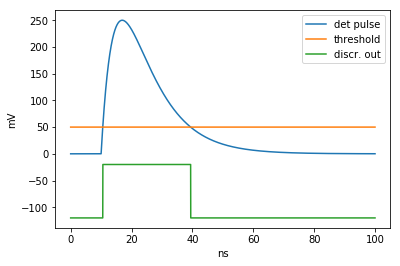

t1 : 10.551 ns, tot : 28.873 ns


In [2]:
##################################################
##             basic discriminator              ##
##################################################

t = np.linspace(0,100e-9,10000) # be sure to make not to few steps, if you have a sharp IR
y = detector_signal_function(t, 100e-12, 5e-9, 10e-9, 10e-9)

thresh = 50e-3

discr, t1, tot = discriminate(t,y,thresh)

plt.plot(t*1e9,y*1e3,label="det pulse")
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold")
plt.plot(t*1e9,discr*100-120,label="discr. out")
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

print("t1 : {:3.3f} ns, tot : {:3.3f} ns".format(t1*1e9,tot*1e9))

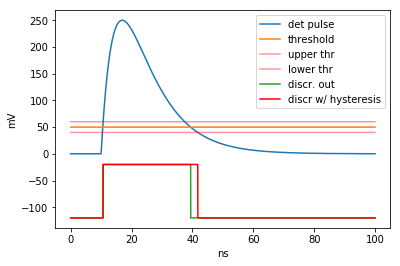

t1 : 10.671 ns, tot : 31.093 ns


In [3]:
##################################################
##               with hysteresis                ##
##################################################
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

t = np.linspace(0,100e-9,10000) # be sure to make not to few steps, if you have a sharp IR
y = detector_signal_function(t, 100e-12, 5e-9, 10e-9, 10e-9)

thresh = 50e-3
hysteresis = 20e-3
hyst_offset = 0e-3

discr_hyst, t1, tot = discriminate(t,y,thresh,
                                   hysteresis = hysteresis,
                                   hyst_offset = hyst_offset)

plt.plot(t*1e9,y*1e3,label="det pulse",color=colors[0])
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold",color=colors[1])
plt.plot(t*1e9,y*0+(thresh+hysteresis/2+hyst_offset)*1e3,label="upper thr",color="red",alpha=0.4)
plt.plot(t*1e9,y*0+(thresh-hysteresis/2+hyst_offset)*1e3,label="lower thr",color="red",alpha=0.4)
plt.plot(t*1e9,discr*100-120,label="discr. out",color=colors[2])
plt.plot(t*1e9,discr_hyst*100-120,label="discr w/ hysteresis",color="red")
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

print("t1 : {:3.3f} ns, tot : {:3.3f} ns".format(t1*1e9,tot*1e9))